In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/deeplearning/train.csv')

In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data.shape

(20800, 5)

In [ ]:
df=data.dropna()

In [ ]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
x=df.drop('label',axis=1)

In [ ]:
y=df['label']

In [ ]:
vocab_size=5000

In [ ]:
news=x.copy()

In [ ]:
news.reset_index(inplace=True)

In [ ]:


import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
news['title'][5]

'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart'

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
sentences=[]
for i in range(0,len(news)):
  sent=re.sub('[^A-Za-z]',' ',news['title'][i])
  sent=sent.lower()
  sent=sent.split()
  sent=[stemmer.stem(word) for word in sent if word not in set(stopwords.words('english'))]
  sent=' '.join(sent)
  sentences.append(sent)
sentences[1:10]

['flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [ ]:
onehotRep=[one_hot(word,vocab_size) for word in sentences]
onehotRep[1:10]

[[4204, 1664, 2, 4048, 865, 3796, 4175],
 [1739, 3032, 4714, 3184],
 [2367, 2180, 3832, 4682, 3716, 1079],
 [3764, 865, 1776, 179, 4029, 262, 865, 620, 1379, 3220],
 [323,
  1175,
  2429,
  357,
  524,
  1915,
  4147,
  2299,
  2708,
  3902,
  417,
  3156,
  4404,
  2058,
  4175],
 [1525, 984, 518, 574, 1249, 2697, 4140, 1131, 1897, 282, 3252],
 [3452, 4767, 3426, 1680, 3473, 479, 1915, 557, 1897, 282, 3252],
 [929, 3637, 59, 3736, 899, 4554, 2159, 4543, 1915, 339],
 [941, 1201, 4981, 4725, 8, 3138, 1125, 1305]]

In [ ]:
sentlen=20
padSeq=pad_sequences(onehotRep,padding='pre',maxlen=sentlen)
print(padSeq[1:10])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0 4204
  1664    2 4048  865 3796 4175]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0 1739 3032 4714 3184]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  2367 2180 3832 4682 3716 1079]
 [   0    0    0    0    0    0    0    0    0    0 3764  865 1776  179
  4029  262  865  620 1379 3220]
 [   0    0    0    0    0  323 1175 2429  357  524 1915 4147 2299 2708
  3902  417 3156 4404 2058 4175]
 [   0    0    0    0    0    0    0    0    0 1525  984  518  574 1249
  2697 4140 1131 1897  282 3252]
 [   0    0    0    0    0    0    0    0    0 3452 4767 3426 1680 3473
   479 1915  557 1897  282 3252]
 [   0    0    0    0    0    0    0    0    0    0  929 3637   59 3736
   899 4554 2159 4543 1915  339]
 [   0    0    0    0    0    0    0    0    0    0    0    0  941 1201
  4981 4725    8 3138 1125 1305]]


In [ ]:
embeddingFeature=40
model=Sequential()
model.add(Embedding(vocab_size,embeddingFeature,input_length=sentlen))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
import numpy as np
X_final=np.array(padSeq)
y_final=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [ ]:
print('Train data shape: ',X_train.shape)
print('\nTest data shape: ',X_test.shape)

Train data shape:  (12250, 20)

Test data shape:  (6035, 20)


In [ ]:
X_test.shape

(6035, 20)

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 10s 10ms/step - loss: 0.3306 - accuracy: 0.8401 - val_loss: 0.1961 - val_accuracy: 0.9193
Epoch 2/10
192/192 [==============================] - 2s 8ms/step - loss: 0.1389 - accuracy: 0.9467 - val_loss: 0.1890 - val_accuracy: 0.9225
Epoch 3/10
192/192 [==============================] - 2s 8ms/step - loss: 0.0947 - accuracy: 0.9657 - val_loss: 0.2407 - val_accuracy: 0.9220
Epoch 4/10
192/192 [==============================] - 2s 8ms/step - loss: 0.0697 - accuracy: 0.9749 - val_loss: 0.2523 - val_accuracy: 0.9117
Epoch 5/10
192/192 [==============================] - 2s 8ms/step - loss: 0.0471 - accuracy: 0.9849 - val_loss: 0.2740 - val_accuracy: 0.9095
Epoch 6/10
192/192 [==============================] - 2s 8ms/step - loss: 0.0260 - accuracy: 0.9925 - val_loss: 0.3481 - val_accuracy: 0.9056
Epoch 7/10
192/192 [==============================] - 2s 8ms/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.3959 - val_accuracy: 0.9162
Epoc

In [ ]:
model.save('/content/drive/MyDrive/FakeNews/FakeNews.h5')

In [ ]:
import matplotlib.pyplot as plt

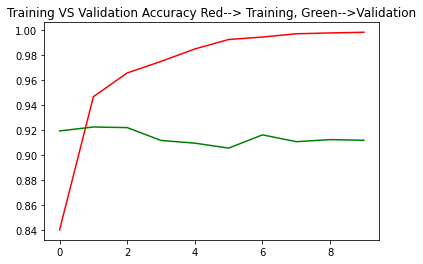

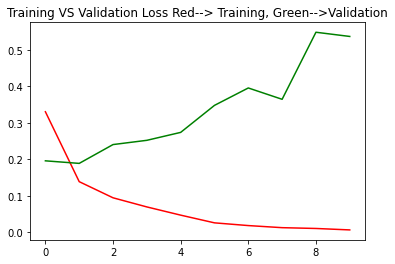

In [ ]:
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='g')
plt.title('Training VS Validation Accuracy Red--> Training, Green-->Validation')
plt.show()
plt.figure()
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.title('Training VS Validation Loss Red--> Training, Green-->Validation')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sas

In [ ]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred = (model.predict(X_test) >= 0.5).astype("int")

In [ ]:
accuracy_score(y_test, y_pred)

0.911847555923778

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3419
           1       0.88      0.92      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3089,  330],
       [ 202, 2414]])

Text(69.0, 0.5, 'Truth')

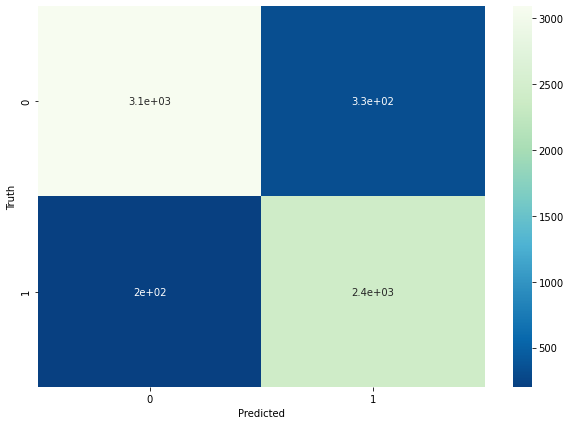

In [ ]:
plt.figure(figsize=(10,7))
sas.heatmap(cm, annot=True,cmap='GnBu_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/FakeNews/FakeNews.h5')

In [ ]:
def TestNews(new):
  sent=re.sub('[^A-Za-z]',' ',new)
  sent=sent.lower()
  sent=sent.split()
  sent=[stemmer.stem(word) for word in sent if word not in set(stopwords.words('english'))]
  sent=' '.join(sent)
  ohRep=[one_hot(sent,vocab_size)] #one hot representation
  pSeq=pad_sequences(ohRep,padding='pre',maxlen=sentlen)
  d=np.array(pSeq)
  predVal=model.predict(d)
  if predVal<0.5:
    return 'Fake',predVal[0][0]
  else:
    return 'True',predVal[0][0]

In [ ]:
new=str(input('Enter News: '))
res,pred=TestNews(new)
print('The news is : ',res)
print('Prediction Value',pred)

Enter News: Samsung, After Combustible Galaxy Note 7, Unveils New Smartphone - The New York Times
The news is :  Fake
Prediction Value 8.2422695e-05


In [ ]:
#Some cases
'Nukes and the UN: a Historic Treaty to Ban Nuclear Weapons'
#label=1
'Samsung, After Combustible Galaxy Note 7, Unveils New Smartphone - The New York Times'
#label=0
'Sparking An Inner Revolution'
#label=1
'Mindful Eating as Way to Fight Bingeing - The New York Times'
#label=0

'Mindful Eating as Way to Fight Bingeing - The New York Times'